In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, accuracy_score, f1_score, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
o dataset e escolha as features (relembre da resolução do exercicio em aula)

1
from sklearn.neighbors import KNeighborsRegressor
2
from sklearn.model_selection import GridSearchCV
3
​
4
houses = pd.read_csv('usa_housing.csv')
1
X = houses[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
2
y = houses['Price']
2 - Efetue o train test split

1
X_train, X_test, y_train, y_test = train_test_split(X, 
2
                                                    y, 
3
                                                    test_size=0.2, 
4
                                                    random_state=42)
3 - Defina as etapas do pipeline, aqui o estimador deve ser o KNeighborsRegressor

1
lista_etapas = [("std_scaler", StandardScaler()), 
2
                ("knn", KNeighborsRegressor())]
4 - Instancie o pipeline

1
pipe = Pipeline(lista_etapas)
5 - Faça a divisão dos folds

1
splitter = KFold(n_splits=10, shuffle=True, random_state=42)
6 - Defina as métricas que o GridSearch irá avaliar

1
metrica = "neg_mean_absolute_error"
2
​
3
param_grid = {"knn__weights" : ["uniform", "distance"],
4
              "knn__metric" : ["manhattan", "euclidean"],
5
              "knn__n_neighbors" : range(2, 21)}
7 - Instanciar o GridSearch

1
# verbose=10 pra muitas combinações, os prints vão pro terminal
2
grid_knn_reg = GridSearchCV(estimator=pipe, 
3
                            param_grid=param_grid,
4
                            scoring=metrica,
5
                            cv=splitter)
8 - Fazer o fit do GridSearch

1
grid_knn_reg.fit(X_train, y_train)
GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')
9 - Avalie os resultados

1
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
2
​
3
# predições de treino
4
y_pred_train = grid_knn_reg.predict(X_train)
5
​
6
print("\nMétricas de treino:\n")
7
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
8
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
9
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
10
​
11
# predições de teste
12
y_pred_test = grid_knn_reg.predict(X_test)
13
​
14
print("\nMétricas de teste:\n")
15
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
16
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
17
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 

Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

###  EXERCÍCIO 2

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [26]:
dt = sns.load_dataset("titanic")

In [27]:
dt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
dt.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [43]:
X = dt.select_dtypes(np.number).drop(columns=["survived","age"]) #tirado target e age por ter mtos nulos
y = dt["survived"]

In [44]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify=y)

In [45]:
y_train.value_counts(dropna=False, normalize=True)

0    0.616573
1    0.383427
Name: survived, dtype: float64

In [48]:
pipe = Pipeline([("dtc", DecisionTreeClassifier(random_state=42))])


params_grid_dtc = {"dtc__criterion" : ["gini", "entropy", "log_loss"],
                  "dtc__splitter" : ["best", "random"],
                  "dtc__max_depth" : range(4, 15),
                  "dtc__min_samples_leaf" : range(1,5)}   

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_dtc = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dtc,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=0)

grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dtc',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dtc__criterion': ['gini', 'entropy', 'log_loss'],
                         'dtc__max_depth': range(4, 15),
                         'dtc__min_samples_leaf': range(1, 5),
                         'dtc__splitter': ['best', 'random']},
             scoring='f1_weighted')

In [50]:
grid_dtc.best_params_

{'dtc__criterion': 'gini',
 'dtc__max_depth': 12,
 'dtc__min_samples_leaf': 4,
 'dtc__splitter': 'random'}

In [51]:
y_pred = grid_dtc.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       110
           1       0.69      0.45      0.54        69

    accuracy                           0.71       179
   macro avg       0.70      0.66      0.67       179
weighted avg       0.71      0.71      0.69       179



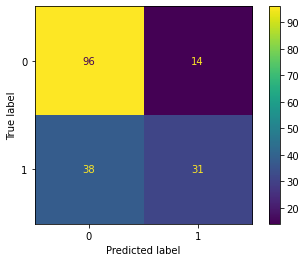

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred); #normalize = 'true');

In [61]:
y_train.unique().astype(str)

array(['1', '0'], dtype='<U21')

In [62]:
modelo = grid_dtc.best_estimator_["dtc"] # lembre-se de resgatar sua arvore do pipeline que está dentro do grid search
nomes_das_variaveis = X_train.columns
nomes_das_classes = y_train.unique().astype(str) # tive que converter as classes para string, se não não aceita :/


# Aqui, os passos para salvar a árvore direto, sem que ela abra no notebook

plt.figure(figsize = (50, 50), dpi = 300) # criei a figura
plot_tree(modelo, feature_names=nomes_das_variaveis, class_names = nomes_das_classes, filled = True) # plotei
plt.savefig("arvore_exercicio_2.png") # salvei
plt.close() # fechei

## EXERCÍCIO 3

In [60]:
df = pd.read_csv('insurance.csv')

In [61]:
df['flag_sex'] = np.where(df['sex'] == 'female', 1,0)

In [62]:
df['is_smoker'] = np.where(df['smoker']== 'yes',1,0)

In [63]:
df['target'] = np.where(df['charges'] < 10000, 0, np.where(df['charges'] < 30000, 1, 2))

In [64]:
df= df.drop(columns=['sex', 'smoker', 'region', 'charges'])

In [65]:
df

,age,bmi,children,flag_sex,is_smoker,target
0,19,27.900,0,1,1,1
1,18,33.770,1,0,0,0
2,28,33.000,3,0,0,0
3,33,22.705,0,0,0,1
4,32,28.880,0,0,0,0
...,...,...,...,...,...,...
1333,50,30.970,3,0,0,1
1334,18,31.920,0,1,0,0
1335,18,36.850,0,1,0,0
1336,21,25.800,0,1,0,0


In [66]:
X = df.drop('target', axis=1)
y= df['target']

In [67]:
y.value_counts(normalize=True)

0    0.532138
1    0.346786
2    0.121076
Name: target, dtype: float64

In [68]:
X_train, X_test, y_train, y_test, = train_test_split(X,
                                                     y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [70]:
lista_etapas = [("dt", DecisionTreeClassifier())]

pipe_dt = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(f1_score, pos_label="f1")

param_grid = {"dt__criterion" : ["gini","entropy"],
             "dt__splitter": ["best","random"],
             "dt__max_depth": range(4,11)}

grid_dt = GridSearchCV(estimator = pipe_dt,
                      param_grid=param_grid,
                      scoring=metrica,
                      cv=splitter,
                      verbose=10)

grid_dt.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV 1/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 1/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[CV 2/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 2/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[CV 3/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 3/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[CV 4/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 4/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[CV 5/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 5/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[C

[CV 3/10; 7/28] END dt__criterion=gini, dt__max_depth=7, dt__splitter=best;, score=nan total time=   0.0s
[CV 4/10; 7/28] START dt__criterion=gini, dt__max_depth=7, dt__splitter=best....
[CV 4/10; 7/28] END dt__criterion=gini, dt__max_depth=7, dt__splitter=best;, score=nan total time=   0.0s
[CV 5/10; 7/28] START dt__criterion=gini, dt__max_depth=7, dt__splitter=best....
[CV 5/10; 7/28] END dt__criterion=gini, dt__max_depth=7, dt__splitter=best;, score=nan total time=   0.0s
[CV 6/10; 7/28] START dt__criterion=gini, dt__max_depth=7, dt__splitter=best....
[CV 6/10; 7/28] END dt__criterion=gini, dt__max_depth=7, dt__splitter=best;, score=nan total time=   0.0s
[CV 7/10; 7/28] START dt__criterion=gini, dt__max_depth=7, dt__splitter=best....
[CV 7/10; 7/28] END dt__criterion=gini, dt__max_depth=7, dt__splitter=best;, score=nan total time=   0.0s
[CV 8/10; 7/28] START dt__criterion=gini, dt__max_depth=7, dt__splitter=best....
[CV 8/10; 7/28] END dt__criterion=gini, dt__max_depth=7, dt__spli

[CV 6/10; 14/28] END dt__criterion=gini, dt__max_depth=10, dt__splitter=random;, score=nan total time=   0.0s
[CV 7/10; 14/28] START dt__criterion=gini, dt__max_depth=10, dt__splitter=random
[CV 7/10; 14/28] END dt__criterion=gini, dt__max_depth=10, dt__splitter=random;, score=nan total time=   0.0s
[CV 8/10; 14/28] START dt__criterion=gini, dt__max_depth=10, dt__splitter=random
[CV 8/10; 14/28] END dt__criterion=gini, dt__max_depth=10, dt__splitter=random;, score=nan total time=   0.0s
[CV 9/10; 14/28] START dt__criterion=gini, dt__max_depth=10, dt__splitter=random
[CV 9/10; 14/28] END dt__criterion=gini, dt__max_depth=10, dt__splitter=random;, score=nan total time=   0.0s
[CV 10/10; 14/28] START dt__criterion=gini, dt__max_depth=10, dt__splitter=random
[CV 10/10; 14/28] END dt__criterion=gini, dt__max_depth=10, dt__splitter=random;, score=nan total time=   0.0s
[CV 1/10; 15/28] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=best
[CV 1/10; 15/28] END dt__criterion=entropy,

[CV 4/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 5/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 5/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 6/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 6/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 7/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 7/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 8/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 8/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 9/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 9/10; 22/28] END dt__

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(4, 11),
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, pos_label=f1), verbose=10)

In [71]:
grid_dt.best_estimator_

Pipeline(steps=[('dt', DecisionTreeClassifier(max_depth=4))])


Métricas de avaliação de treino:
[[559  10   0]
 [ 54 317   0]
 [  1  12 117]]


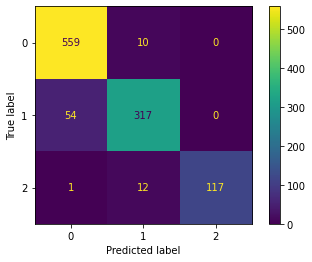

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       569
           1       0.94      0.85      0.89       371
           2       1.00      0.90      0.95       130

    accuracy                           0.93      1070
   macro avg       0.95      0.91      0.93      1070
weighted avg       0.93      0.93      0.93      1070


Métricas de avaliação de teste:
[[139   4   0]
 [ 17  75   1]
 [  0   5  27]]


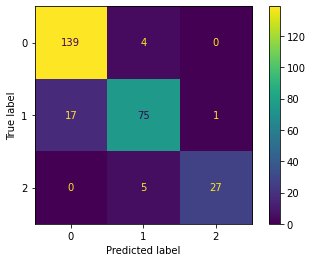

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       143
           1       0.89      0.81      0.85        93
           2       0.96      0.84      0.90        32

    accuracy                           0.90       268
   macro avg       0.92      0.87      0.89       268
weighted avg       0.90      0.90      0.90       268



In [72]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [73]:
lista_etapas = [("rf", RandomForestClassifier())]

pipe_rf = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(f1_score, pos_label="f1")

## ====================

param_grid = {"rf__max_depth" : range(5, 10),
              "rf__max_features" : range(1, 5)}

grid_rf = GridSearchCV(estimator=pipe_rf, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 1/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.1s
[CV 2/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 2/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.1s
[CV 3/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 3/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.1s
[CV 4/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 4/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.1s
[CV 5/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 5/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.1s
[CV 6/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 6/10; 1/20] 

[CV 10/10; 5/20] END rf__max_depth=6, rf__max_features=1;, score=nan total time=   0.1s
[CV 1/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 1/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.1s
[CV 2/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 2/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.1s
[CV 3/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 3/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.1s
[CV 4/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 4/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.1s
[CV 5/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 5/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.1s
[CV 6/10; 6/20] START rf__max_depth=6, rf__max_features=2...............

[CV 1/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.1s
[CV 2/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 2/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.1s
[CV 3/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 3/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.1s
[CV 4/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 4/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.1s
[CV 5/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 5/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.1s
[CV 6/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 6/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.1s
[CV 7/10; 11/20] START rf__max_depth=7, rf__max_features=3.........

[CV 10/10; 15/20] END rf__max_depth=8, rf__max_features=3;, score=nan total time=   0.1s
[CV 1/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 1/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.1s
[CV 2/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 2/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.1s
[CV 3/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 3/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.1s
[CV 4/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 4/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.1s
[CV 5/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 5/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.1s
[CV 6/10; 16/20] START rf__max_depth=8, rf__max_features=4........

[CV 10/10; 20/20] END rf__max_depth=9, rf__max_features=4;, score=nan total time=   0.1s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': range(5, 10),
                         'rf__max_features': range(1, 5)},
             scoring=make_scorer(f1_score, pos_label=f1), verbose=10)

In [74]:
grid_rf.best_estimator_

Pipeline(steps=[('rf', RandomForestClassifier(max_depth=5, max_features=1))])


Métricas de avaliação de treino:
[[565   4   0]
 [ 63 308   0]
 [  2  11 117]]


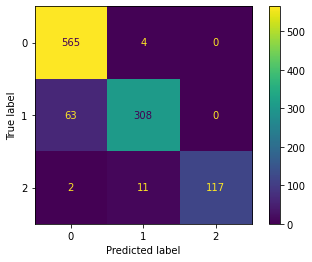

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       569
           1       0.95      0.83      0.89       371
           2       1.00      0.90      0.95       130

    accuracy                           0.93      1070
   macro avg       0.95      0.91      0.93      1070
weighted avg       0.93      0.93      0.92      1070


Métricas de avaliação de teste:
[[140   3   0]
 [ 18  75   0]
 [  0   5  27]]


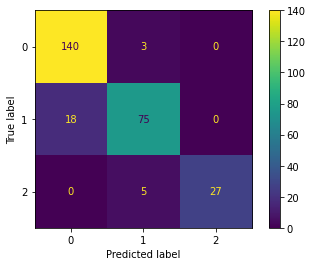

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       143
           1       0.90      0.81      0.85        93
           2       1.00      0.84      0.92        32

    accuracy                           0.90       268
   macro avg       0.93      0.88      0.90       268
weighted avg       0.91      0.90      0.90       268



In [75]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [79]:
lista_etapas = [("ab", AdaBoostClassifier())]

pipe_ab = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(f1_score, pos_label="f1")

## ====================

param_grid = {"ab__n_estimators" : range(40, 60)}

grid_ab = GridSearchCV(estimator=pipe_ab, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_ab.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START ab__n_estimators=40.......................................
[CV 1/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.1s
[CV 2/10; 1/20] START ab__n_estimators=40.......................................
[CV 2/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.0s
[CV 3/10; 1/20] START ab__n_estimators=40.......................................
[CV 3/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.0s
[CV 4/10; 1/20] START ab__n_estimators=40.......................................
[CV 4/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.0s
[CV 5/10; 1/20] START ab__n_estimators=40.......................................
[CV 5/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.0s
[CV 6/10; 1/20] START ab__n_estimators=40.......................................
[CV 6/10; 1/20] END ..........ab__n_estimators

[CV 2/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 3/10; 6/20] START ab__n_estimators=45.......................................
[CV 3/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 4/10; 6/20] START ab__n_estimators=45.......................................
[CV 4/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 5/10; 6/20] START ab__n_estimators=45.......................................
[CV 5/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 6/10; 6/20] START ab__n_estimators=45.......................................
[CV 6/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 7/10; 6/20] START ab__n_estimators=45.......................................
[CV 7/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 8/10; 6/20] START ab__n_estimators=45.......................................
[CV 8/10; 6/20] END ........

[CV 7/10; 11/20] END .........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 8/10; 11/20] START ab__n_estimators=50......................................
[CV 8/10; 11/20] END .........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 9/10; 11/20] START ab__n_estimators=50......................................
[CV 9/10; 11/20] END .........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 10/10; 11/20] START ab__n_estimators=50.....................................
[CV 10/10; 11/20] END ........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 1/10; 12/20] START ab__n_estimators=51......................................
[CV 1/10; 12/20] END .........ab__n_estimators=51;, score=nan total time=   0.0s
[CV 2/10; 12/20] START ab__n_estimators=51......................................
[CV 2/10; 12/20] END .........ab__n_estimators=51;, score=nan total time=   0.0s
[CV 3/10; 12/20] START ab__n_estimators=51......................................
[CV 3/10; 12/20] END .......

[CV 1/10; 17/20] END .........ab__n_estimators=56;, score=nan total time=   0.1s
[CV 2/10; 17/20] START ab__n_estimators=56......................................
[CV 2/10; 17/20] END .........ab__n_estimators=56;, score=nan total time=   0.1s
[CV 3/10; 17/20] START ab__n_estimators=56......................................
[CV 3/10; 17/20] END .........ab__n_estimators=56;, score=nan total time=   0.1s
[CV 4/10; 17/20] START ab__n_estimators=56......................................
[CV 4/10; 17/20] END .........ab__n_estimators=56;, score=nan total time=   0.1s
[CV 5/10; 17/20] START ab__n_estimators=56......................................
[CV 5/10; 17/20] END .........ab__n_estimators=56;, score=nan total time=   0.0s
[CV 6/10; 17/20] START ab__n_estimators=56......................................
[CV 6/10; 17/20] END .........ab__n_estimators=56;, score=nan total time=   0.1s
[CV 7/10; 17/20] START ab__n_estimators=56......................................
[CV 7/10; 17/20] END .......

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ab', AdaBoostClassifier())]),
             param_grid={'ab__n_estimators': range(40, 60)},
             scoring=make_scorer(f1_score, pos_label=f1), verbose=10)

In [80]:
grid_ab.best_estimator_

Pipeline(steps=[('ab', AdaBoostClassifier(n_estimators=40))])


Métricas de avaliação de treino:
[[522  47   0]
 [ 56 259  56]
 [  1  50  79]]


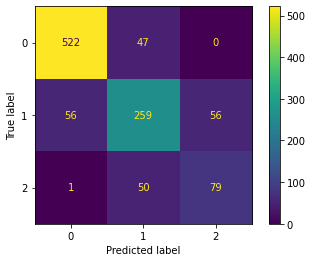

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       569
           1       0.73      0.70      0.71       371
           2       0.59      0.61      0.60       130

    accuracy                           0.80      1070
   macro avg       0.74      0.74      0.74      1070
weighted avg       0.80      0.80      0.80      1070


Métricas de avaliação de teste:
[[129  14   0]
 [ 14  66  13]
 [  0  16  16]]


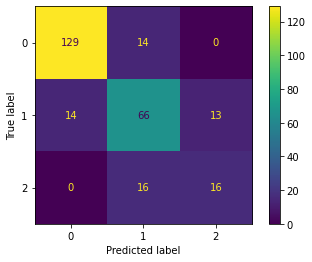

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       143
           1       0.69      0.71      0.70        93
           2       0.55      0.50      0.52        32

    accuracy                           0.79       268
   macro avg       0.71      0.70      0.71       268
weighted avg       0.79      0.79      0.79       268



In [81]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_ab.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_ab.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

## Exercício 2
Para praticarmos e para comparar também, repita o mesmo procedimento com um KNN. Para isso:

carregue o conjunto de dados
separe um conjunto de validação final
aplique a busca aleatória com os hiperparâmetros adequados para cada modelo - escolha três hiperparâmetros - utilizando a estrutura do Pipeline conforme mostramos
use uma distribuição uniforme para o valor de k entre 1 e 100
compare os resultados obtidos entre si e também com os resultados da regressão linear

In [14]:
import os
import warnings
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, make_scorer
from sklearn.metrics import accuracy_score, r2_score

# ignorar warnings
warnings.filterwarnings('ignore')

# definir uma constante
DATASOURCE = '.'

In [3]:
# realizar a leitura dos dados
data = pd.read_csv(os.path.join(DATASOURCE, 'breast_cancer.csv'))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# eliminando coluna 'ID'
data.drop(['id'], axis = 1, inplace=True)

In [8]:
#separar preditores e target
x = data.drop(['diagnosis'], axis=1)
y = data[['diagnosis']]

#separar um conjunto de validação final
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [9]:
# checando o desbalanceamento
y.value_counts(normalize=True)

diagnosis
B            0.627417
M            0.372583
dtype: float64

In [10]:
# checando o balanceamento na base de treino 
y_train.value_counts(normalize=True)

diagnosis
B            0.626374
M            0.373626
dtype: float64

In [11]:
# construir o pipeline
steps = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())]
pipe = Pipeline(steps)

In [12]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [23]:

metrica = make_scorer(f1_score, pos_label="M")

# construir um dicionário de parâmetros
param_dict = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

# criar o objeto selecionador
rs_cv = RandomizedSearchCV(pipe, param_dict, scoring = metrica, cv = splitter, verbose = 10)
rs_cv.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START model__C=1, model__l1_ratio=0.5, model__penalty=none......


ValueError: Invalid parameter model for estimator Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

### PROVA

In [5]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import make_regression 
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

X, y = make_regression(n_samples = 400, n_features = 5, n_informative = 3, noise = 20, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42) 

In [6]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier(n_estimators=3, \
                                                   max_depth=5, \
                                                   random_state=42, \
                                                   n_jobs=-1))]

pipe_rf = Pipeline(lista_etapas).fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [7]:
print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))


Métricas de avaliação de treino:


NameError: name 'pipe_rf' is not defined